In [18]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)
test_data_gen = test_image_generator.flow_from_directory(
    PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    classes=['test'],
    shuffle=False
)

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [15]:
# 5
train_image_generator = ImageDataGenerator(
    train_dir,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255
)


In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation="relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2)
    ])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

model.summary()

In [24]:
# 8
history = model.fit(
    x=train_data_gen,
    # steps_per_epoch=batch_size, TAKES TOO LONG TO COMPILE WITH 128 IN EACH EPOCH
    epochs=epochs,
    validation_data=val_data_gen,
)

Epoch 1/15
16/16 [==============================] - 74s 5s/step - loss: 0.6944 - accuracy: 0.5205 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 70s 4s/step - loss: 0.6927 - accuracy: 0.4915 - val_loss: 0.6890 - val_accuracy: 0.4990
Epoch 3/15
16/16 [==============================] - 67s 4s/step - loss: 0.6913 - accuracy: 0.5265 - val_loss: 0.6859 - val_accuracy: 0.5310
Epoch 4/15
16/16 [==============================] - 68s 4s/step - loss: 0.6872 - accuracy: 0.5350 - val_loss: 0.6732 - val_accuracy: 0.6280
Epoch 5/15
16/16 [==============================] - 69s 4s/step - loss: 0.6749 - accuracy: 0.5750 - val_loss: 0.6573 - val_accuracy: 0.5680
Epoch 6/15
16/16 [==============================] - 66s 4s/step - loss: 0.6582 - accuracy: 0.5905 - val_loss: 0.6563 - val_accuracy: 0.5640
Epoch 7/15
16/16 [==============================] - 68s 4s/step - loss: 0.6511 - accuracy: 0.6185 - val_loss: 0.6653 - val_accuracy: 0.6030
Epoch 8/15
16/16 [==

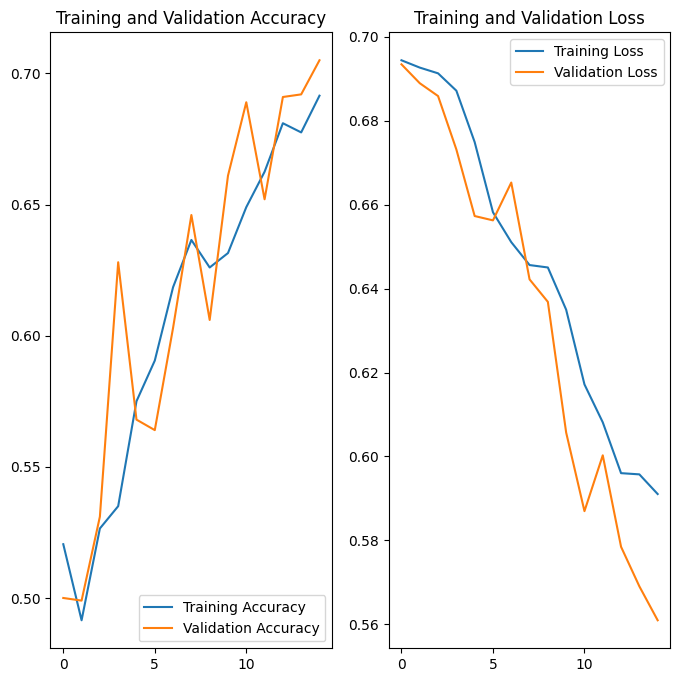

In [25]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
probabilities = model.predict(test_data_gen).flatten()
probabilities

1/1 [==============================] - 1s 552ms/step


array([-5.15127517e-02, -1.99060336e-01,  3.40081394e-01, -1.07736087e+00,
        7.53846705e-01, -1.72223330e+00, -1.99989639e-02,  2.79260099e-01,
       -6.85882121e-02,  7.97498077e-02, -3.04693542e-02,  1.33131996e-01,
       -5.22799678e-02,  4.08335447e-01,  3.31847131e-01, -8.03682804e-01,
        1.69516787e-01, -1.69884115e-02, -3.53482813e-01,  2.28173280e+00,
        3.74641538e-01, -3.85606050e-01, -1.01085439e-01,  7.08808422e-01,
        1.17476925e-01, -3.31427991e-01,  3.81051987e-01, -1.74980247e+00,
        4.50453423e-02,  1.12690479e-02, -1.43040404e-01,  8.61828089e-01,
       -8.30986947e-02,  4.14649844e-01, -2.60730952e-01,  1.76499856e+00,
       -3.01687606e-03,  5.54178208e-02, -8.53495598e-02,  5.67103446e-01,
        5.46943605e-01, -1.44265950e+00,  1.14572942e-01, -2.23627985e-02,
        3.19928288e-01, -1.77768618e-02,  6.51693270e-02, -1.18950620e-01,
        1.78235725e-01,  1.13429680e-01,  1.95429161e-01, -5.06186187e-01,
       -1.63524523e-01,  

In [27]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 44.0% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!
